# DATASET ANALYSIS

## IMPORTS


In [16]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score


In [17]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


## LOAD DATASET


In [18]:
# Let's load the dataset
data = pd.read_csv('data/synth_data_for_training.csv')

# Let's specify the features and the target
y = data['checked']
X = data.drop(['checked'], axis=1)
X = X.astype(np.float32)

# Let's split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## SHOW DATASET FEATURES

In [19]:
for column in X.columns:
    print(column)

adres_aantal_brp_adres
adres_aantal_verschillende_wijken
adres_aantal_verzendadres
adres_aantal_woonadres_handmatig
adres_dagen_op_adres
adres_recentst_onderdeel_rdam
adres_recentste_buurt_groot_ijsselmonde
adres_recentste_buurt_nieuwe_westen
adres_recentste_buurt_other
adres_recentste_buurt_oude_noorden
adres_recentste_buurt_vreewijk
adres_recentste_plaats_other
adres_recentste_plaats_rotterdam
adres_recentste_wijk_charlois
adres_recentste_wijk_delfshaven
adres_recentste_wijk_feijenoord
adres_recentste_wijk_ijsselmonde
adres_recentste_wijk_kralingen_c
adres_recentste_wijk_noord
adres_recentste_wijk_other
adres_recentste_wijk_prins_alexa
adres_recentste_wijk_stadscentru
adres_unieke_wijk_ratio
afspraak_aanmelding_afgesloten
afspraak_aantal_woorden
afspraak_afgelopen_jaar_afsprakenplan
afspraak_afgelopen_jaar_monitoring_insp__wet_taaleis_na_12_mnd_n_a_v__taa04_____geen_maatregel
afspraak_afgelopen_jaar_ontheffing
afspraak_afgelopen_jaar_ontheffing_taaleis
afspraak_afgelopen_jaar_plan_va

## DISTRIBUTION OF TARGET VALUE

<Axes: xlabel='checked', ylabel='count'>

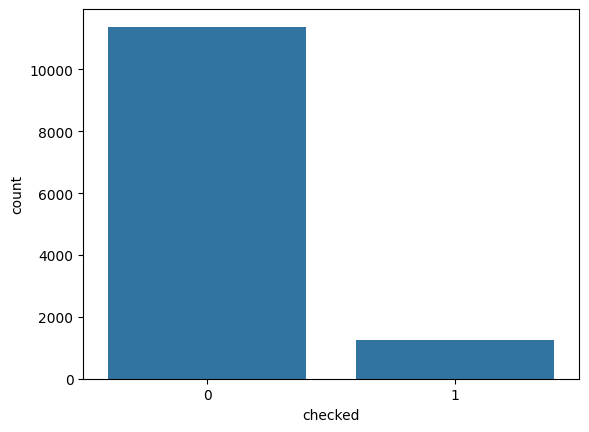

In [20]:
# Visualize the distribution of the target variable 'checked'
sns.countplot(x='checked', data=data)

In [21]:


# Create a dropdown menu with all the features
feature_dropdown = widgets.Dropdown(
    options=data.columns,
    description='Feature:',
)

# Create a new output area for the dropdown menu
output = widgets.Output()

# Define a function to update the plot when a new feature is selected
def update_plot(feature):
    with output:
        clear_output(wait=True)  # Clear the current output
        sns.histplot(data=data, x=feature, legend=True)
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {feature}')
        plt.show()

# Display the dropdown menu and the initial plot
display(feature_dropdown)
display(output)

# Call the update_plot function when a new feature is is selected
feature_dropdown.observe(lambda change: update_plot(change.new), names='value')

Dropdown(description='Feature:', options=('adres_aantal_brp_adres', 'adres_aantal_verschillende_wijken', 'adre…

Output()

## ANALYSE BIAS IN MODEL PREDICTIONS


In [22]:
# Define a gradient boosting classifier
classifier = MLPClassifier(hidden_layer_sizes=5, activation='relu', learning_rate='adaptive')

In [23]:
# Create a pipeline object with our selector and classifier
# NOTE: You can create custom pipeline objects but they must be registered to onnx or it will not recognise them
# Because of this we recommend using the onnx known objects as defined in the documentation
pipeline = Pipeline(steps=[('classification', classifier)])



In [24]:
# Let's train a simple model
pipeline.fit(X_train, y_train)

# Let's evaluate the model
y_pred = pipeline.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the original model: ', original_accuracy)

Accuracy of the original model:  0.9133459835547122


## Confusion Matrix


In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[2742  114]
 [ 160  146]]


## Classification Report

In [30]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2856
           1       0.56      0.48      0.52       306

    accuracy                           0.91      3162
   macro avg       0.75      0.72      0.73      3162
weighted avg       0.91      0.91      0.91      3162



## ROC Curve and AUC

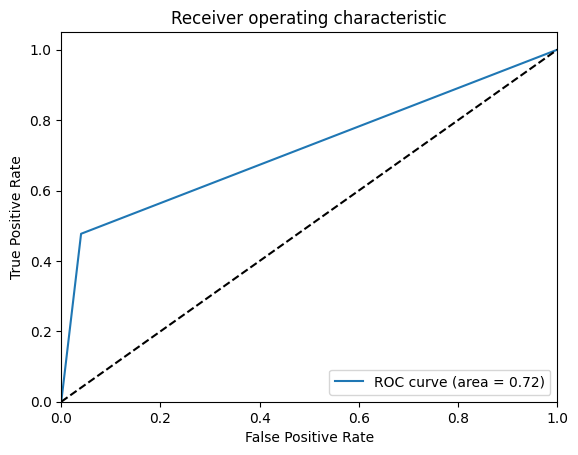

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()